In [54]:
import random
from shapely.geometry import Polygon, Point, MultiPoint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
#South Park 9 hole course hole 1
p_list = [(40.321854, -79.996663), (40.321823, -79.996694), (40.321793, -79.996705)
            , (40.321757, -79.996703), (40.321726, -79.996688), (40.321703, -79.996669)
            , (40.321679, -79.996646), (40.321665, -79.996612), (40.321651, -79.996570)
            , (40.321644, -79.996539), (40.321649, -79.996498), (40.321662, -79.996465)
            , (40.321683, -79.996442), (40.321712, -79.996427), (40.321739, -79.996421)
            , (40.321769, -79.996425), (40.321790, -79.996437), (40.321807, -79.996449)
            , (40.321829, -79.996468), (40.321843, -79.996489), (40.321858, -79.996516)
            , (40.321870, -79.996548), (40.321874, -79.996583), (40.321870, -79.996625)]
p = Polygon(p_list)

In [271]:
#Berkley hole 5
p_list = [(40.289288, -78.932620), (40.289309, -78.932644), (40.289337, -78.932660)
            , (40.289366, -78.932667), (40.289399, -78.932655), (40.289421, -78.932637)
            , (40.289440, -78.932596), (40.289450, -78.932553), (40.289449, -78.932511)
            , (40.289441, -78.932459), (40.289433, -78.932427), (40.289412, -78.932389)
            , (40.289391, -78.932366), (40.289361, -78.932357), (40.289337, -78.932359)
            , (40.289319, -78.932362), (40.289299, -78.932380), (40.289281, -78.932409)
            , (40.289268, -78.932426), (40.289261, -78.932452), (40.289254, -78.932486)
            , (40.289253, -78.932521), (40.289256, -78.932547), (40.289264, -78.932580)]
p = Polygon(p_list)

In [278]:
xmin, ymin, xmax, ymax = p.bounds  # -4.85674599573635, 37.174925051829, -4.85258684662671, 37.1842384372115
n = 3e5
x = np.arange(np.floor(xmin * n) / n, np.ceil(xmax * n) / n, 1 / n)  # array([-4.857, -4.856, -4.855, -4.854, -4.853])
y = np.arange(np.floor(ymin * n) / n, np.ceil(ymax * n) / n, 1 / n)  # array([37.174, 37.175, 37.176, 37.177, 37.178, 37.179, 37.18 , 37.181, 37.182, 37.183, 37.184, 37.185])
points = MultiPoint(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))
result = points.intersection(p)

In [279]:
center_points = []
i = 0
while i < len(result):
    center = [result[i].x,result[i].y]
    center_points.append(center)
    i += 1

In [280]:
api_list = p_list + center_points
api_df = pd.DataFrame(api_list)
api_df.columns = ['longitude','latitude']
api_df = api_df.drop_duplicates()

In [282]:
len(api_list)

4299

In [284]:
i = 0
j = len(api_list)
out_list = []
while i < j:
    print(i,j)
    loc_str = ''
    api_list_temp = api_list[i:(i+200)]
    for a in api_list_temp:
        if len(loc_str) == 0:
            loc_str = str(a[0]) + ',' + str(a[1])
        else:
            loc_str = loc_str + '|' + str(a[0]) + ',' + str(a[1])
    key = 'keyhere'
    url = "https://maps.googleapis.com/maps/api/elevation/json?locations={}&key={}".format(loc_str,key)
    payload={}
    headers = {}
    print(len(url))
    response = requests.request("GET", url, headers=headers, data=payload)
    for attribute, value in response.json().items():
        for v in value:
            if attribute == 'results':
                for key, value in v.items():
                    if key == 'elevation':
                        elevation = value
                    elif key == 'location':
                        lat = v.get('location').get('lat')
                        lng = v.get('location').get('lng')
                temp = [lat,lng,elevation]
                out_list.append(temp)
    print(len(out_list))
    i += 200

0 4299
6828
200
200 4299
7485
400
400 4299
7534
600
600 4299
7467
800
800 4299
7547
1000
1000 4299
7468
1200
1200 4299
7556
1400
1400 4299
7432
1600
1600 4299
7503
1800
1800 4299
7375
2000
2000 4299
7559
2200
2200 4299
7470
2400
2400 4299
7498
2600
2600 4299
7530
2800
2800 4299
7533
3000
3000 4299
7579
3200
3200 4299
7499
3400
3400 4299
7603
3600
3600 4299
7502
3800
3800 4299
7557
4000
4000 4299
7523
4200
4200 4299
3753
4299


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

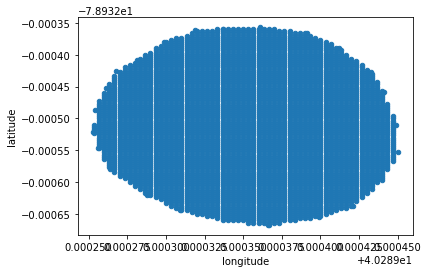

In [283]:
api_df.plot.scatter(x='longitude', y = 'latitude')

In [285]:
out_list

[[40.289288, -78.93262, 480.7926025390625],
 [40.289309, -78.932644, 480.9269104003906],
 [40.289337, -78.93266, 481.0946655273438],
 [40.289366, -78.932667, 481.2591247558594],
 [40.289399, -78.932655, 481.4185180664062],
 [40.289421, -78.932637, 481.5260620117188],
 [40.28944, -78.932596, 481.6010131835938],
 [40.28945, -78.932553, 481.6052551269531],
 [40.289449, -78.932511, 481.5597534179688],
 [40.289441, -78.932459, 481.4697265625],
 [40.289433, -78.932427, 481.3260498046875],
 [40.289412, -78.932389, 481.132080078125],
 [40.289391, -78.932366, 480.9889526367188],
 [40.289361, -78.932357, 480.8455200195312],
 [40.289337, -78.932359, 480.7434692382812],
 [40.289319, -78.932362, 480.6607666015625],
 [40.289299, -78.93238, 480.5791625976562],
 [40.289281, -78.932409, 480.5177917480469],
 [40.289268, -78.932426, 480.4548950195312],
 [40.289261, -78.932452, 480.4011840820312],
 [40.289254, -78.932486, 480.3634643554688],
 [40.289253, -78.932521, 480.444091796875],
 [40.289256, -78.932

In [286]:
api_df = pd.DataFrame(out_list)
api_df.columns = ['longitude','latitude','elevation']

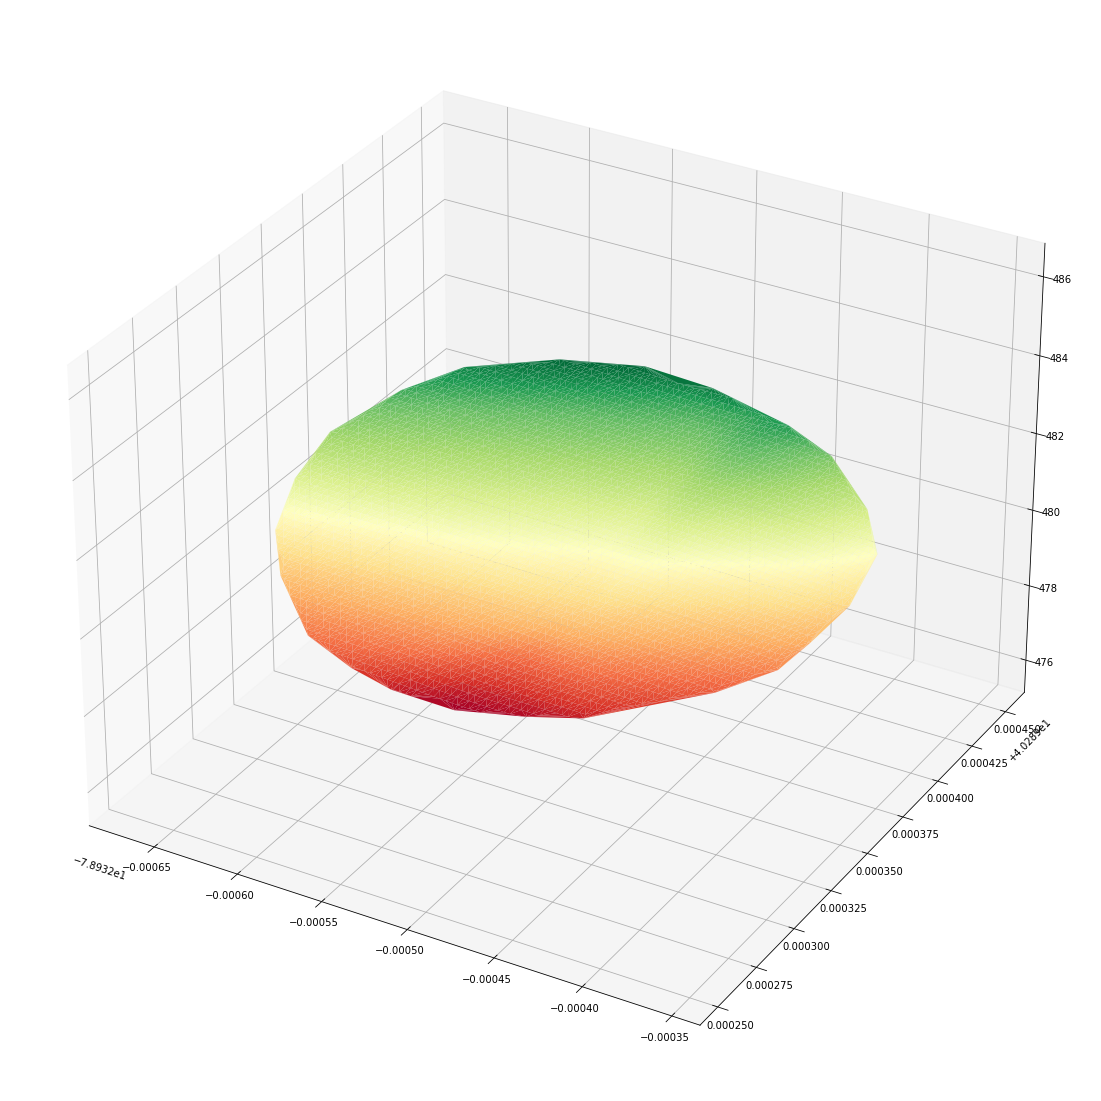

In [295]:
# Get X, Y, Z
X, Y, Z = api_df['latitude'], api_df['longitude'], api_df['elevation']

# Plot X,Y,Z
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, cmap = 'RdYlGn')
ax.set_zlim(api_df['elevation'].min()-5, api_df['elevation'].max() + 5)
plt.show()

In [247]:
print(api_df.to_string())

      longitude   latitude   elevation
0     40.321854 -79.996663  360.666168
1     40.321823 -79.996694  360.711731
2     40.321793 -79.996705  360.749481
3     40.321757 -79.996703  360.924347
4     40.321726 -79.996688  361.056122
5     40.321703 -79.996669  361.121460
6     40.321679 -79.996646  361.071960
7     40.321665 -79.996612  361.169739
8     40.321651 -79.996570  361.237732
9     40.321644 -79.996539  361.184967
10    40.321649 -79.996498  361.055542
11    40.321662 -79.996465  361.082123
12    40.321683 -79.996442  361.103790
13    40.321712 -79.996427  361.061859
14    40.321739 -79.996421  360.995483
15    40.321769 -79.996425  360.906097
16    40.321790 -79.996437  360.752258
17    40.321807 -79.996449  360.603455
18    40.321829 -79.996468  360.470245
19    40.321843 -79.996489  360.505219
20    40.321858 -79.996516  360.521057
21    40.321870 -79.996548  360.472656
22    40.321874 -79.996583  360.574341
23    40.321870 -79.996625  360.657928
24    40.321645 -79.99654

In [293]:
print(api_df['elevation'].min() / .3048,api_df['elevation'].min() / .3048 % 1 * 12)

1575.9956179641365 11.947415569637997


In [294]:
print(api_df['elevation'].max() / .3048,api_df['elevation'].max() / .3048 % 1 * 12)

1580.0697346684813 0.836816021775121
